**Importing Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.linear_model import LinearRegression     # For creating the model
from sklearn.metrics import mean_squared_error        # For evaluating model performance

**Load the dataset**

In [4]:
from sklearn.datasets import fetch_california_housing
boston = fetch_california_housing()

**Convert to DataFrame**

In [5]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target

print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


**Explore the Data** to see how **house price** **relates** to the **number of rooms** (AveRooms)

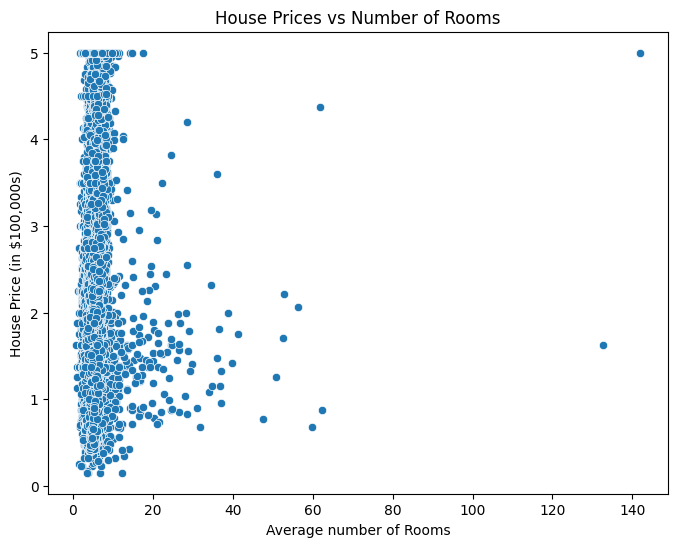

In [6]:
# Scatter Plot of Average Rooms vs Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['AveRooms'], y=df['PRICE'])
plt.xlabel('Average number of Rooms')
plt.ylabel('House Price (in $100,000s)')
plt.title('House Prices vs Number of Rooms')
plt.show()

**Prepare the Data for Training**

In [9]:
# Define input (X) and output (y)
X = df[['AveRooms']]   # Feature (number of rooms)
y = df['PRICE']     # Target (house price)

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data: {X_train.shape}, Testing Data: {X_test.shape}")

Training Data: (16512, 1), Testing Data: (4128, 1)


**Train the Linear Regression Model**

In [10]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

print(f"Slope (m): {model.coef_[0]:.4f}")
print(f"Intercept (b): {model.intercept_:.4f}")

Slope (m): 0.0768
Intercept (b): 1.6548


**Make Predictions**

In [11]:
y_pred = model.predict(X_test)

predictions = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(predictions.head())

    Actual  Predicted
0  0.47700   1.976537
1  0.45800   2.041563
2  5.00001   1.960031
3  2.18600   2.127856
4  2.78000   2.076380


- We use model.predict(X_test) to predict prices for test houses.
- We compare actual prices with predicted prices.

**Evaluate Model Performance** : checking how accurate our model is

In [13]:
# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 1.2923


- It calculates the Mean Squared Error (MSE) to measure how far our predictions are from actual prices.
- **Lower MSE means better model**.


**Plot the Best Fit Line**

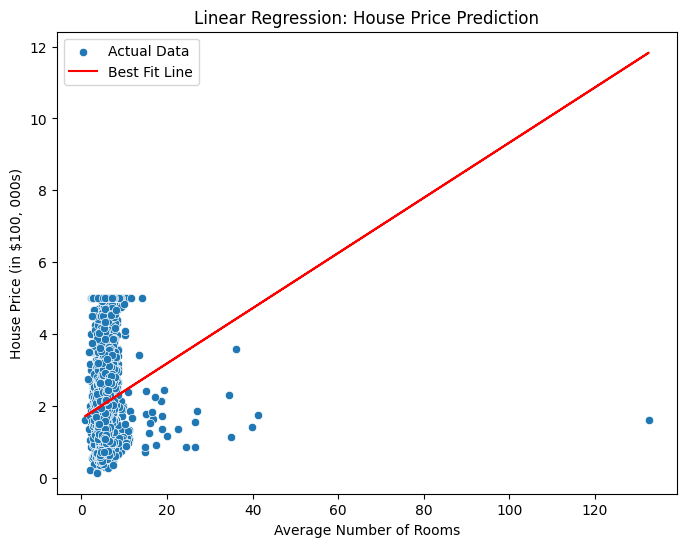

In [18]:
# Scatter plot of actual data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test['AveRooms'], y=y_test, label='Actual Data')

# Plot the best-fit line
plt.plot(X_test, y_pred, color='red', label='Best Fit Line')

plt.xlabel('Average Number of Rooms')
plt.ylabel('House Price (in $100, 000s)')
plt.legend()
plt.title('Linear Regression: House Price Prediction')
plt.show()